In [52]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from costs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [53]:
def least_squares(y, tx, loss_type='mse'):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w_star = np.dot(np.linalg.inv(np.dot(tx.T, tx)), np.dot(tx.T, y))
    mse = compute_loss(y, tx, w_star, loss_type)
    return mse, w_star

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [54]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse_ls, w_ls = least_squares(y, tx)
    print(mse_ls, w_ls)
    

Test it here

In [55]:
test_your_least_squares()

15.3858878688294 [73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [56]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [60]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    phi_xn = np.zeros((x.shape[0], degree))
    for i in range(phi_xn.shape[0]):
        phi_xn[i] = [x[i]**j for j in range(degree)]
    return phi_xn

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [63]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse_ls, w_ls = least_squares(y, tx)
        rmse = np.sqrt(2 * mse_ls)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w_ls, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.7078805834165345
Processing 2th experiment, degree=3, rmse=0.46698196895441396
Processing 3th experiment, degree=7, rmse=0.24969890274508671
Processing 4th experiment, degree=12, rmse=0.2555351522054776


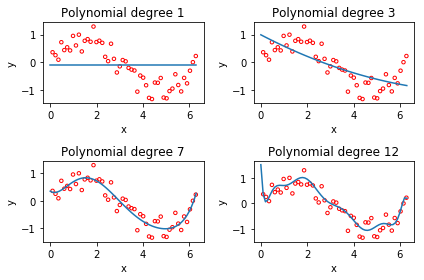

In [64]:
polynomial_regression()

# 2 Evaluating model prediction performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [75]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    idx = np.random.permutation(x.shape[0])
    cut = int(np.floor(ratio * x.shape[0]))
    idx_tr = idx[:cut]
    idx_te = idx[cut:]

    x_train, y_train = x[idx_tr], y[idx_tr]
    x_test, y_test = x[idx_te], y[idx_te]
    
    return (x_train, y_train, x_test, y_test)

Then, test your `split_data` function below.

In [76]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse_tr, w_tr = least_squares(y_train, tx_train)
    mse_te = compute_loss(y_test, tx_test, w_tr, loss_type='mse')
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * mse_tr)
    rmse_te = np.sqrt(2 * mse_te)

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [77]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.734, Testing RMSE=0.403
proportion=0.9, degree=3, Training RMSE=0.487, Testing RMSE=0.211
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.214
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.251
proportion=0.5, degree=1, Training RMSE=0.795, Testing RMSE=0.611
proportion=0.5, degree=3, Training RMSE=0.451, Testing RMSE=0.565
proportion=0.5, degree=7, Training RMSE=0.233, Testing RMSE=0.282
proportion=0.5, degree=12, Training RMSE=0.238, Testing RMSE=0.560
proportion=0.1, degree=1, Training RMSE=0.820, Testing RMSE=0.805
proportion=0.1, degree=3, Training RMSE=0.279, Testing RMSE=0.686
proportion=0.1, degree=7, Training RMSE=1.635, Testing RMSE=3.750
proportion=0.1, degree=12, Training RMSE=20.845, Testing RMSE=18.549


# 3 Ridge Regression
Please fill in the function below.

In [87]:
def ridge_regression(y, tx, lambda_, loss_type='mse'):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w_ridge = np.dot(np.linalg.inv(np.dot(tx.T, tx) + lambda_), np.dot(tx.T, y))
    mse_ridge = compute_loss(y, tx, w_ridge, loss_type)
    return mse_ridge, w_ridge

In [90]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        mse_tr, w_tr = ridge_regression(y_train, tx_train, lambda_, loss_type='mse')
        mse_te = compute_loss(y_test, tx_test, w_tr, loss_type='mse')
        # ***************************************************
        # INSERT YOUR CODE HERE
        # calculate RMSE for train and test data,
        # and store them in rmse_tr and rmse_te respectively: TODO
        # ***************************************************
        rmse_tr.append(np.sqrt(2 * mse_tr))
        rmse_te.append(np.sqrt(2 * mse_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.227, Testing RMSE=0.340
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.227, Testing RMSE=0.339
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.227, Testing RMSE=0.330
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.228, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.193, 

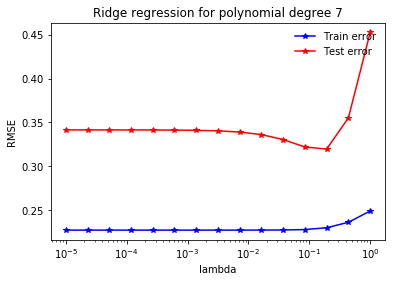

In [91]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)